In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle

!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 162M/163M [00:08<00:00, 26.3MB/s]
100% 163M/163M [00:08<00:00, 21.2MB/s]


In [5]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/Face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

data  face-mask-dataset.zip  Face-mask-dataset.zip  kaggle.json  __MACOSX  sample_data


**Importing the Dependencies**

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_301.jpg', 'with_mask_1502.jpg', 'with_mask_1726.jpg', 'with_mask_1391.jpg', 'with_mask_1240.jpg']
['with_mask_2865.jpg', 'with_mask_1624.jpg', 'with_mask_702.jpg', 'with_mask_1947.jpg', 'with_mask_1007.jpg']


In [9]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1754.jpg', 'without_mask_3105.jpg', 'without_mask_618.jpg', 'without_mask_1066.jpg', 'without_mask_1992.jpg']
['without_mask_1698.jpg', 'without_mask_2968.jpg', 'without_mask_572.jpg', 'without_mask_2264.jpg', 'without_mask_2255.jpg']


In [10]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [13]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [14]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [15]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [16]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

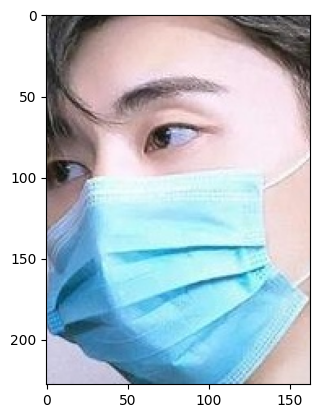

In [17]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

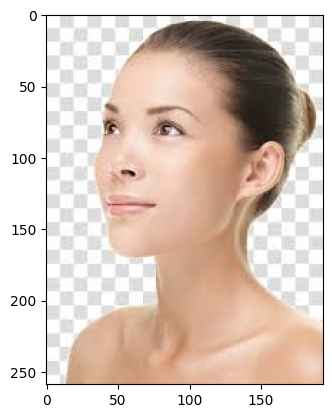

In [18]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

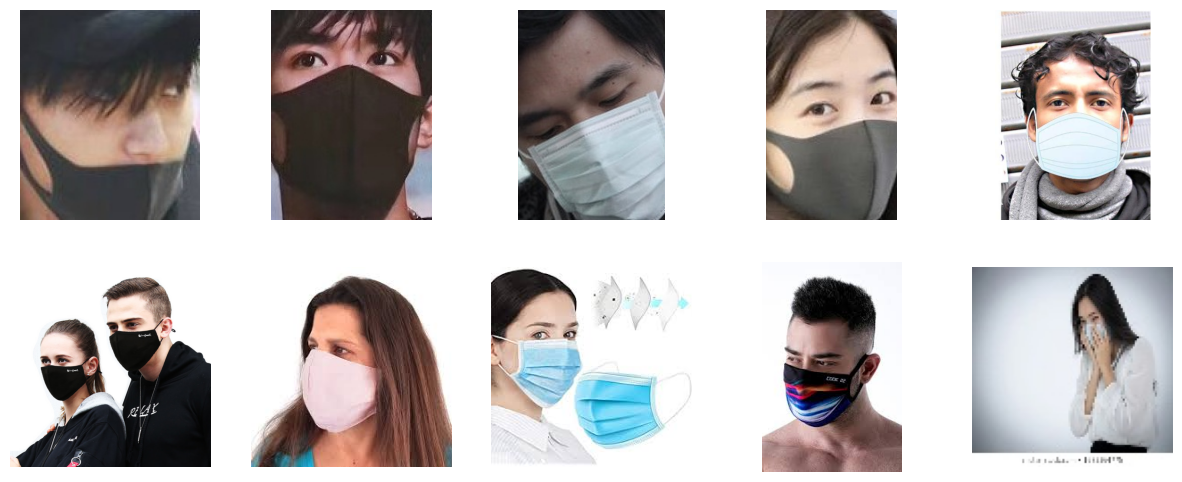

In [26]:
import matplotlib.pyplot as plt
import os

# Path to your data folder
data_folder = "/content/data/with_mask"

# Get list of image filenames
image_files = os.listdir(data_folder)

# Take the first 10 image files
first_10_images = image_files[:10]

# Create a subplot with 2 rows and 5 columns to display the first 10 images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i, image_file in enumerate(first_10_images):
    # Load the image
    image_path = os.path.join(data_folder, image_file)
    image = plt.imread(image_path)

    # Plot the image on the corresponding subplot
    row = i // 5
    col = i % 5
    axes[row, col].imshow(image)
    axes[row, col].axis('off')

plt.show()

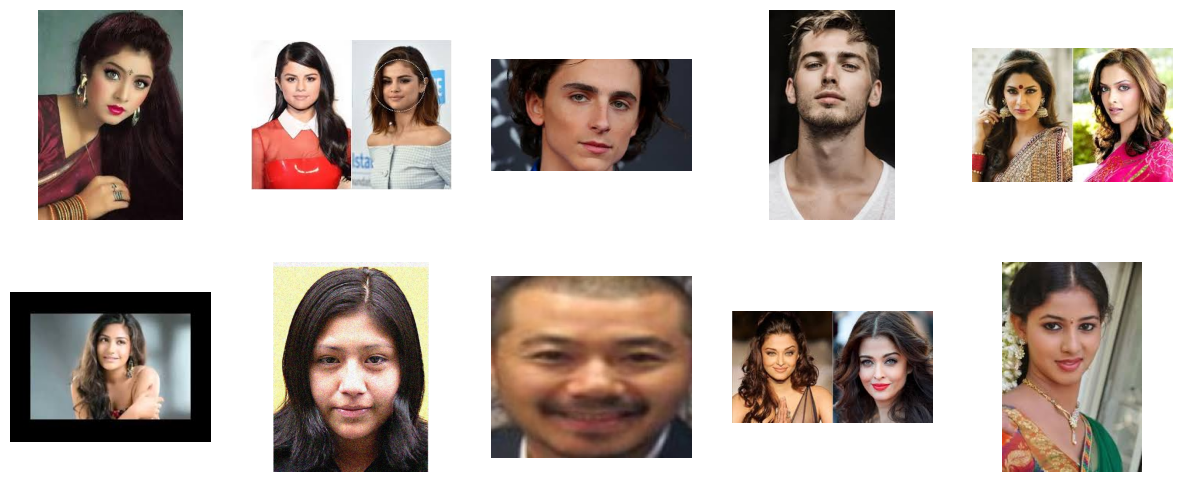

In [27]:
import matplotlib.pyplot as plt
import os

# Path to your data folder
data_folder = "/content/data/without_mask"

# Get list of image filenames
image_files = os.listdir(data_folder)

# Take the first 10 image files
first_10_images = image_files[:10]

# Create a subplot with 2 rows and 5 columns to display the first 10 images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i, image_file in enumerate(first_10_images):
    # Load the image
    image_path = os.path.join(data_folder, image_file)
    image = plt.imread(image_path)

    # Plot the image on the corresponding subplot
    row = i // 5
    col = i % 5
    axes[row, col].imshow(image)
    axes[row, col].axis('off')

plt.show()

Error processing image data: 'NoneType' object has no attribute 'shape'
Error processing image __MACOSX: 'NoneType' object has no attribute 'shape'


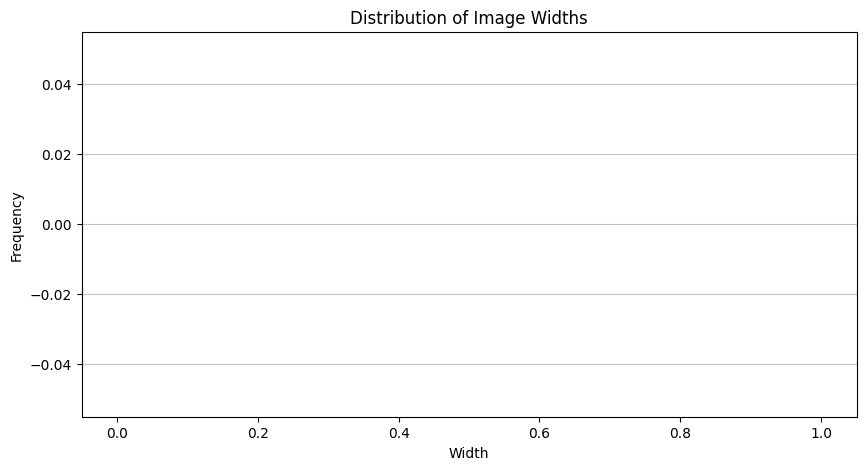

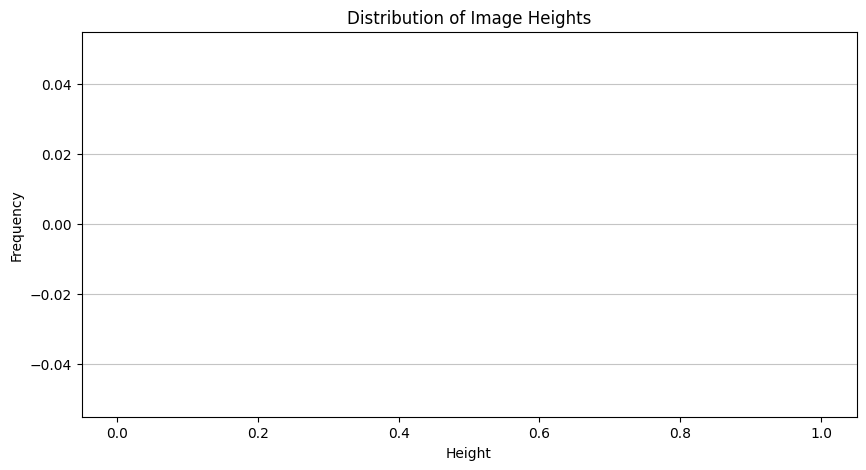

In [23]:
import os
import zipfile
import cv2
import matplotlib.pyplot as plt
from io import BytesIO
import numpy as np

# Path to your zip file
zip_file_path = "/content/Face-mask-dataset.zip"

# Directory to extract the images to
extract_dir = "extracted_images"

# Create extract directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List all extracted images
images = os.listdir(extract_dir)

# Initialize lists to store image widths and heights
widths = []
heights = []

# Iterate over the first 10 images or all images if there are fewer than 10
for image_name in images[:10]:
    image_path = os.path.join(extract_dir, image_name)
    try:
        image = cv2.imread(image_path)
        h, w, _ = image.shape
        widths.append(w)
        heights.append(h)
    except Exception as e:
        print(f"Error processing image {image_name}: {e}")

# Plot histogram of image widths
plt.figure(figsize=(10, 5))
plt.hist(widths, bins=50, color='b', alpha=0.7)
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.title('Distribution of Image Widths')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Plot histogram of image heights
plt.figure(figsize=(10, 5))
plt.hist(heights, bins=50, color='r', alpha=0.7)
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Distribution of Image Heights')
plt.grid(axis='y', alpha=0.75)
plt.show()



**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [28]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [29]:
type(data)

list

In [30]:
len(data)

7553

array([[[45, 46, 51],
        [45, 46, 51],
        [45, 46, 51],
        ...,
        [59, 63, 75],
        [52, 56, 67],
        [44, 47, 56]],

       [[45, 46, 51],
        [45, 46, 51],
        [44, 45, 50],
        ...,
        [59, 62, 74],
        [55, 58, 67],
        [48, 51, 60]],

       [[43, 44, 49],
        [43, 44, 49],
        [43, 44, 49],
        ...,
        [47, 49, 61],
        [47, 50, 58],
        [43, 46, 55]],

       ...,

       [[84, 68, 49],
        [87, 68, 51],
        [94, 71, 57],
        ...,
        [82, 85, 92],
        [83, 86, 93],
        [85, 88, 95]],

       [[82, 66, 49],
        [87, 68, 53],
        [93, 70, 56],
        ...,
        [82, 85, 92],
        [82, 85, 92],
        [83, 86, 93]],

       [[82, 65, 49],
        [87, 68, 53],
        [92, 69, 55],
        ...,
        [81, 84, 91],
        [81, 84, 91],
        [82, 85, 92]]], dtype=uint8)
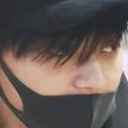

In [31]:
data[0]

In [32]:
type(data[0])

numpy.ndarray

In [33]:
data[0].shape

(128, 128, 3)

In [34]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [35]:
type(X)

numpy.ndarray

In [36]:
type(Y)

numpy.ndarray

In [37]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [38]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [41]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 253],
        [252, 253, 249],
        [251, 252, 246]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [228, 228, 229],
        [249, 250, 247],
        [253, 253, 248]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [189, 188, 191],
        [244, 245, 244],
        [255, 255, 252]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [202, 201, 206],
        [181, 182, 180],
        [189, 190, 183]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [242, 243, 233],
        [234, 236, 222],
        [213, 215, 199]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [238, 241, 221],
        [250, 252, 233],
        [231, 233, 214]]], dtype=uint8)
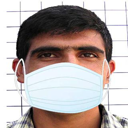

In [42]:
X_train[0]

In [43]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.99607843, 0.99607843, 0.99215686],
        [0.98823529, 0.99215686, 0.97647059],
        [0.98431373, 0.98823529, 0.96470588]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.89411765, 0.89411765, 0.89803922],
        [0.97647059, 0.98039216, 0.96862745],
        [0.99215686, 0.99215686, 0.97254902]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.74117647, 0.7372549 , 0.74901961],
        [0.95686275, 0.96078431, 0.95686275],
        [1.        , 1.        , 0.98823529]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1